# Regresión lineal: predecir los gastos médicos de pacientes
---

Para este ejercicio utilizaremos los datos presentados en [este](https://www.kaggle.com/mirichoi0218/insurance) dataset de Kaggle

## Descarga e instalación de librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme(style='whitegrid', context='notebook')

## Descargando los datos
Descarguemos los datos y veamos cómo se ven.

In [2]:
df = pd.read_csv('../data/raw/insurance.csv') 
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Analizando los datos
Se observará cómo se distribuyen los datos de la variable a predecir.

(1338, 7)


<Axes: >

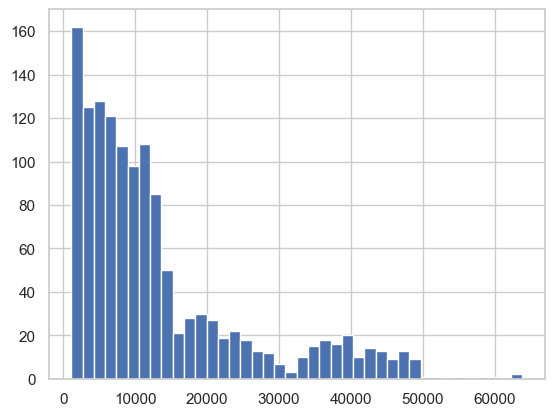

In [3]:
print(df.shape)
df.charges.hist(bins = 40)

Algo que analizar, según este gráfico, es entender qué está pasando con los datos arriba de los 50,000. Parece haber muy pocos datos de este lado.

In [4]:
df[df.charges>50000]

#Store in a new csv the data without the outliers (Where charges are higher that 50000)
df_processed = df[df.charges<50000]
df_processed.to_csv('../data/processed/insurance_processed.csv')
df = df_processed

En este caso, al ser pocos datos (6 de 1338), eliminaremos estos datos atípicos. A modo didáctico producen más ruido en la predicción que se está intentando hacer en este ejercicio.

Sin embargo es importante aclarar que **NO SE DEBEN ELIMINAR** datos atípicos sin antes conocer a alguien que conozca o sea experto en los datos para que pueda guiarnos mejor sobre ellos.

## Viendo correlaciones
Ahora entendamos nuestros datos, viendo cómo se distribuyen y correlacionan.

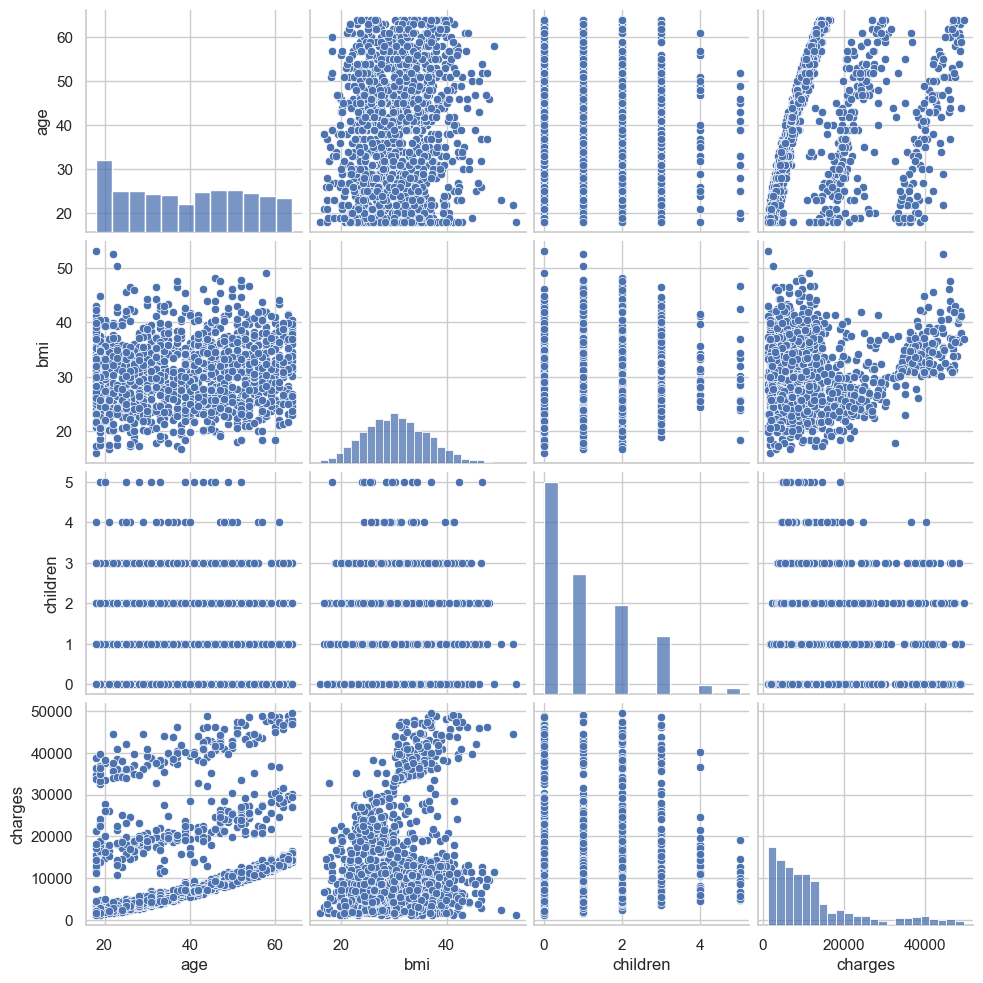

In [5]:
sns.pairplot(df, height=2.5)
plt.show()

Puntos interesantes a ver:

- Hay 3 grupos de personas diferentes que se clasifican en edad / cargos, esto puede ser un punto a analizar después.

En general los valores se distribuyen de manera esperada. Con valores extremos en el caso de los cargos, sin embargo esto es de esperarse pues los cargos en los hospitales pueden variar mucho por quedarse un día más en el hospital o incluso por procedimientos extras.

- Parece que los datos están limpios, la variable de índice de masa corporal se distribuye de manera normal o gausiana, lo cual sería esperado en un índice de este tipo.

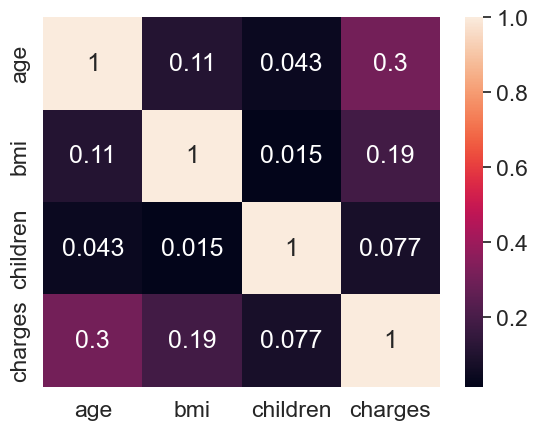

In [6]:
numeric_cols = ['age','bmi','children','charges']
cm = np.corrcoef(df[numeric_cols].values.T)

sns.set_theme(font_scale=1.5)
sns.heatmap(cm,annot=True,yticklabels=numeric_cols, xticklabels=numeric_cols)
plt.show()

## Utilizando las demás variables
Las demás variables son variables categoricas, sexo, fumador, región. Para poder utilizarlas utilizaremos la función get_dummies de pandas.

Ahora la verás en acción

In [7]:
df = pd.get_dummies(df, columns=['sex','smoker','region'], drop_first=True)
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


## Creando modelos
Primero se usará un modelo con todas las variables.

Importar funcion de la clase utils

In [8]:
import importlib
import Utils
importlib.reload(Utils)

from Utils import Modelo

Generar el primer modelo con todas las variables independientes

In [9]:
X_cols = list(set(df.columns)-set(['charges'])) 
y_col = ['charges']

model_1 = Modelo(df,X_cols,y_col)


In [10]:
#Verificamos las dimensiones de nuestro data predichos
model_1.y_pred.shape

(333, 1)

## Funciones de métricas
El siguiente punto es calcular las métricas del modelo.

In [11]:
model_1.GetMetrics()

R2:  0.7482759698288627
MSE:  0.21762032835547593


El siguiente código muestra un resumen general de los resultados.

In [12]:
model_1.GetSummary()

R2 statsmodels: 0.7516385835903086
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     374.1
Date:                Mon, 02 Jun 2025   Prob (F-statistic):          6.42e-293
Time:                        13:44:39   Log-Likelihood:                -741.46
No. Observations:                 998   AIC:                             1501.
Df Residuals:                     989   BIC:                             1545.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const

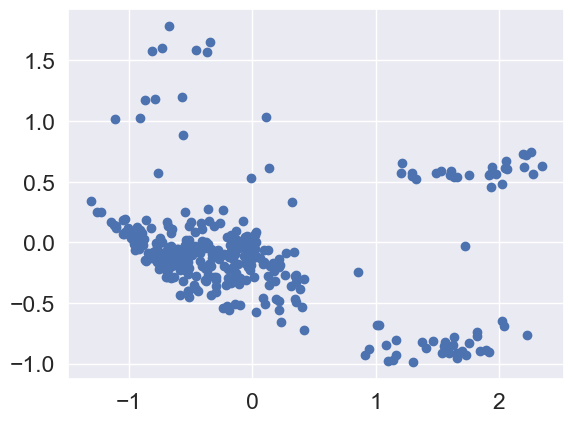

In [13]:
model_1.GetResidualsPlot()

## Segundo modelo
Estos resultados de arriba son buenos, pero se pueden mejorar. Intentaremos hacer algunas transformaciones sobre las variables que pueden ser de utilidad.

In [14]:
df_second = df.copy()
df_second['age2'] = df_second.age**2
df_second['overweight'] = (df_second.bmi >= 30).astype(int)
df_second['overweight*smoker'] = df_second.overweight * df_second.smoker_yes

In [15]:
X_cols_2 = list(set(df_second.columns)-set(['charges'])) 
y_col_2 = ['charges']

model_2 = Modelo(df_second,X_cols_2,y_col_2)

In [16]:
print("====Model 2====")
model_2.GetMetrics()

====Model 2====
R2:  0.8758997388538178
MSE:  0.12913719273641758


In [17]:
model_2.GetSummary()

R2 statsmodels: 0.8626224859857107
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     562.8
Date:                Mon, 02 Jun 2025   Prob (F-statistic):               0.00
Time:                        13:44:39   Log-Likelihood:                -417.86
No. Observations:                 998   AIC:                             859.7
Df Residuals:                     986   BIC:                             918.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
con

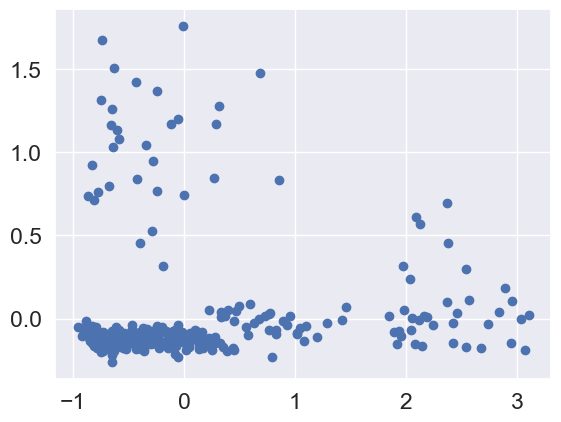

In [18]:
model_2.GetResidualsPlot()

## Tercer modelo
Estos resultados de arriba son buenos, pero se pueden mejorar. Intentaremos no tener en cuenta algunas de las variables de las variables dependientes. Solo usaremos las que tengan un p-valor menor a 

In [19]:
X_cols_3 = ['children', 'smoker_yes', 'age2', 'overweight*smoker', 'region_southwest']
y_col_3 = ['charges']
model_3 = Modelo(df_second,X_cols_3,y_col_3)

In [20]:
print("====Model 3====")
model_3.GetMetrics()

====Model 3====
R2:  0.8865826216295001
MSE:  0.09462497315356959


In [21]:
model_3.GetSummary(intercept=False)

R2 statsmodels: 0.8582002600330259
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.858
Model:                            OLS   Adj. R-squared (uncentered):              0.857
Method:                 Least Squares   F-statistic:                              1202.
Date:                Mon, 02 Jun 2025   Prob (F-statistic):                        0.00
Time:                        13:44:39   Log-Likelihood:                         -467.56
No. Observations:                 998   AIC:                                      945.1
Df Residuals:                     993   BIC:                                      969.6
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]

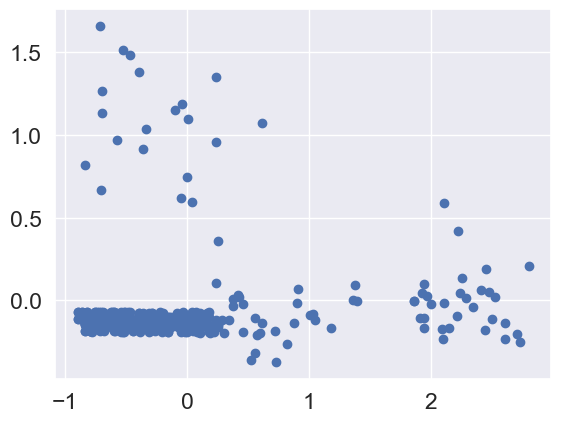

In [22]:
model_3.GetResidualsPlot()